In [14]:
from LDAR_dutyholder import LDAR_travel
import numpy as np
import datetime

In [2]:
# Create a inspection plan with name of dutyholder, id, epsg code of 
# the UTM_zone for projection and mode -> empirical
A = LDAR_travel('A',1,26911,"empirical")

In [3]:
# load service center list and site list 
A.read_service_cnt(r"GrandPriarie.csv","lon","lat")
A.read_site_list(r"GrandPriarie_sample_wells.csv","Longitude",'Latitude')

In [4]:
# veiw site list
A.sites.head()

,OID,Licence,CompName,Latitude,Longitude,KBE,GroundElev,SurfLoc,EDCT,RatingLev,LicStatus,LicStatDat,OpSurvProv,geometry
0,290621,292435,Canadian Natural Resources Limited(0HE9),54.905449,-118.757385,700.799988,695.700012,13-19-068-05W6,360.0,J,Issued,08-Sep-03,Sour,POINT (387324.050 6085683.980)
1,152326,144773,Canadian Natural Resources Limited(0HE9),54.928215,-118.754448,674.500000,669.700012,06-31-068-05W6,NaN,J,Issued,13-Jul-90,Sour,POINT (387575.940 6088212.242)
2,470834,493209,Spartan Delta Corp.(A8HR),54.959015,-118.668442,659.700012,653.700012,07-10-069-05W6,570.0,J,Issued,07-Jan-19,Sour,POINT (393168.417 6091504.385)
3,100850,91855,Whitecap Resources Inc.(A5BE),54.918678,-118.896950,699.099976,693.700012,10-30-068-06W6,NaN,J,Issued,24-Aug-81,NaN,POINT (378416.640 6087389.345)
4,207975,202999,Whitecap Resources Inc.(A5BE),54.919834,-118.907349,707.400024,698.400024,14-30-068-06W6,NaN,J,Issued,27-Jun-97,Sour,POINT (377753.720 6087536.046)


In [5]:
# veiw service center list 
A.sc

,town,lat,lon,geometry
0,Grande Prairie,55.16667,-118.80271,POINT (385168.527 6114821.823)


In [6]:
# download road networks from Open Street Map
A.download_graph_from_OSM(30000,'drive_service')

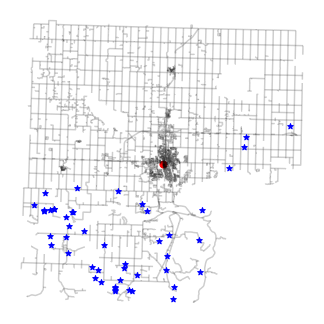

In [7]:
A.create_plot('empirical')

In [8]:
A.get_site_nodes()
A.get_home_nodes()

In [10]:
# add time and distance correction from Google Distance Matrix 
A.sites['dist_diff'] = np.zeros(len(A.sites))
A.sites['time_diff'] = np.zeros(len(A.sites))
# create ID
A.sites['siteID'] = np.arange(1,len(A.sites)+1,1)
# add node for each site 
A.sites['node'] = A.site_nodes
# sample inspection time from OGI inspection time list 
A.sample_inspection_time('ins_time_example.csv')

In [15]:
# case: 1 leak inspection agent, and he works 8 hours per day
start_time = datetime.datetime(2022,1,1,8)
end_time = datetime.datetime(2022,1,1,16)
A.create_agent(1,start_time,end_time)

In [16]:
# start leak inspection 
A.deploy_agents()

2022-01-01 09:11:54.200000 finished leak inspection for site:  25 49
go home - we have leftover:  43
go home - we have leftover:  36
go home - we have leftover:  29
go home - we have leftover:  22
go home - we have leftover:  15
go home - we have leftover:  8
go home - we have leftover:  2
go home, finished the last site of program:  0


In [17]:
# generate leak inspection report 
A.generate_inspection_report()

In [19]:
A.Report[0]

,transit_between_sites,dist_between_sites,transit_home_site,dist_home_site,daily_num_sites,Nodes
0,2653.3,56501.681,1360.3,31303.491,8,"[[2079389083, 2079281262], [2079281262, 198907..."
1,681.9,13590.617,3031.3,68831.847,8,"[[2079389083, 345294449], [345294449, 34527930..."
2,1526.7,32321.847,3109.5,72196.033,8,"[[2079389083, 345371196], [345371196, 34537119..."
3,3018.3,71934.373,2895.2,68731.743,8,"[[2079389083, 343234273], [343234273, 34320398..."
4,4493.6,97704.526,3023.2,65961.193,8,"[[2079389083, 343247622], [343247622, 55553189..."
5,1912.2,39648.770,3160.9,69721.802,8,"[[2079389083, 9017491539], [9017491539, 343259..."
6,3372.0,83775.678,2443.1,53774.419,7,"[[2079389083, 343281024], [343281024, 34328102..."
7,887.8,22618.029,2267.6,52370.230,2,"[[2079389083, 2079394508], [2079394508, 198746..."
